In [ ]:
import pandas as pd


df = pd.read_csv('/kaggle/input/uuuuuiii/ulcer_dataset_kaggle.csv')


categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()


df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)



In [ ]:
df.head()

,image_path,label,split,patient_id,age,sex,smoking,meds,htn,dm,location,periwound,pain_score,periph_pulse_absent,neuropathy,abi,hba1c,doppler
0,/kaggle/input/ulcer-dataset-kaggle1/Ulcer Data...,Arterial Ulcer,train,P00001,55,M,1,bp,1,1,plantar,pale,7,dp,1,0.46,9.0,art_sten
1,/kaggle/input/ulcer-dataset-kaggle1/Ulcer Data...,Venous Ulcer,train,P00002,68,M,1,bp,1,1,med_leg,eczema,2,none,0,0.94,7.8,ven_ins
2,/kaggle/input/ulcer-dataset-kaggle1/Ulcer Data...,Arterial Ulcer,train,P00003,56,M,1,oha,1,1,heel,pale,8,pta,1,0.79,4.4,normal
3,/kaggle/input/ulcer-dataset-kaggle1/Ulcer Data...,Normal Skin,val,P00004,60,M,0,none,0,0,na,na,0,na,0,1.00,5.0,na
4,/kaggle/input/ulcer-dataset-kaggle1/Ulcer Data...,Venous Ulcer,train,P00005,70,M,0,bp,0,0,lat_leg,eczema,2,none,0,0.86,5.5,ven_ins


In [ ]:
import pandas as pd


df = pd.read_csv('/kaggle/input/uuuuuiii/ulcer_dataset_kaggle.csv')


exclude_cols = ['image_path', 'label', 'split', 'patient_id']


feature_cols = [col for col in df.columns if col not in exclude_cols]

# Separate features and metadata
features = df[feature_cols]
metadata = df[exclude_cols]


categorical_cols = features.select_dtypes(include=['object', 'category']).columns.tolist()

# One-hot encode categorical features
features_encoded = pd.get_dummies(features, columns=categorical_cols, drop_first=False)

# combine back metadata if needed
df_processed = pd.concat([metadata, features_encoded], axis=1)
df_processed.head()

,image_path,label,split,patient_id,age,smoking,htn,dm,pain_score,neuropathy,...,periph_pulse_absent_ata,periph_pulse_absent_dp,periph_pulse_absent_na,periph_pulse_absent_none,periph_pulse_absent_pop,periph_pulse_absent_pta,doppler_art_sten,doppler_na,doppler_normal,doppler_ven_ins
0,/kaggle/input/ulcer-dataset-kaggle1/Ulcer Data...,Arterial Ulcer,train,P00001,55,1,1,1,7,1,...,False,True,False,False,False,False,True,False,False,False
1,/kaggle/input/ulcer-dataset-kaggle1/Ulcer Data...,Venous Ulcer,train,P00002,68,1,1,1,2,0,...,False,False,False,True,False,False,False,False,False,True
2,/kaggle/input/ulcer-dataset-kaggle1/Ulcer Data...,Arterial Ulcer,train,P00003,56,1,1,1,8,1,...,False,False,False,False,False,True,False,False,True,False
3,/kaggle/input/ulcer-dataset-kaggle1/Ulcer Data...,Normal Skin,val,P00004,60,0,0,0,0,0,...,False,False,True,False,False,False,False,True,False,False
4,/kaggle/input/ulcer-dataset-kaggle1/Ulcer Data...,Venous Ulcer,train,P00005,70,0,0,0,2,0,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
print(df_processed.columns.to_list())

['image_path', 'label', 'split', 'patient_id', 'age', 'smoking', 'htn', 'dm', 'pain_score', 'neuropathy', 'abi', 'hba1c', 'sex_F', 'sex_M', 'meds_ac', 'meds_bp', 'meds_hf', 'meds_insul', 'meds_none', 'meds_oha', 'location_ankle', 'location_ball', 'location_digit', 'location_dorsum', 'location_heel', 'location_lat_foot', 'location_lat_leg', 'location_med_leg', 'location_na', 'location_plantar', 'periwound_callus', 'periwound_eczema', 'periwound_lipoderm', 'periwound_na', 'periwound_pale', 'periwound_pigm', 'periph_pulse_absent_ata', 'periph_pulse_absent_dp', 'periph_pulse_absent_na', 'periph_pulse_absent_none', 'periph_pulse_absent_pop', 'periph_pulse_absent_pta', 'doppler_art_sten', 'doppler_na', 'doppler_normal', 'doppler_ven_ins']


In [ ]:
!pip install autokeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 6.3 MB/s eta 0:00:00


In [ ]:
import autokeras as ak


exclude_cols = ['image_path', 'label', 'split', 'patient_id']

x_tabular = df.drop(columns = exclude_cols).values

x_images = df['image_path'].values

y = df['label'].values

tabular_input = ak.Input()
image_input = ak.ImageInput()

tabular_encoder = ak.DenseBlock()(tabular_input)
image_encoder = ak.ImageBlock(normalize = True, augment=False)(image_input)

merged = ak.Merge()([tabular_encoder, image_encoder])

output = ak.ClassificationHead()(merged)

clf = ak.AutoModel(
    inputs = [tabular_input, image_input],
    outputs=output,
    max_trials=3
)

In [ ]:

tabular_df = df_processed.drop(columns=['image_path', 'label', 'split', 'patient_id'])


tabular_df = tabular_df.apply(pd.to_numeric, errors='coerce')  # converts object → numeric, NaNs if failed

# Fill any NaNs
tabular_df = tabular_df.fillna(0)


x_tabular = tabular_df.values.astype('float32')


x_images = df_processed['image_path'].values


y = df_processed['label'].values


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def load_images(image_paths, target_size=(224, 224)):
    imgs = []
    for path in image_paths:
        img = image.load_img(path, target_size=target_size)
        img_array = image.img_to_array(img)
        imgs.append(img_array)
    return np.array(imgs, dtype='float32') / 255.0

x_images_numeric = load_images(x_images)

In [ ]:
clf.fit(
    x=[x_tabular, x_images_numeric],
    y=y,
    epochs=20
)


Trial 3 Complete [00h 01m 46s]
val_loss: 1.4969534873962402

Best val_loss So Far: 0.8404666781425476
Total elapsed time: 00h 05m 26s
Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.2414 - loss: 26.0897
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.2609 - loss: 13.5959
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.4131 - loss: 5.7038
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.5216 - loss: 2.0312
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.5285 - loss: 2.9534
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.5932 - loss: 4.9075
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.6061 - loss: 2.0577
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.7062 - loss: 2.5094
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.6790 - loss: 3.9614
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.7106 - loss: 1.8529
Epoch 11/20
6/6 ━━━━━━━━━

In [ ]:
import autokeras as ak

2025-08-25 07:41:35.283673: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756107695.621438    7476 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756107695.714783    7476 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
best_model = load_model("/kaggle/working/auto_model/best_model.keras", custom_objects=ak.CUSTOM_OBJECTS)

I0000 00:00:1756107781.219933    7476 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756107781.220732    7476 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [ ]:
import numpy as np

In [ ]:
single_row = {
     'age': 55,
     'smoking': 0,
     'htn': 0,
     'dm': 1,
     'pain_score': 1,
     'neuropathy': 1,
     'abi': 0.9,
     'hba1c': 8,
     'sex_F': 0,
     'sex_M': 1,
     'meds_ac': 0,
     'meds_bp': 0,
     'meds_hf': 0,
     'meds_insul': 1,
     'meds_none': 0,
     'meds_oha': 0,
     'location_ankle': 0,
     'location_ball': 0,
     'location_digit': 0,
     'location_dorsum': 0,
     'location_heel': 1,
     'location_lat_foot': 0,
     'location_lat_leg': 0,
     'location_med_leg': 0,
     'location_na': 0,
     'location_plantar': 0,
     'periwound_callus': 1,
     'periwound_eczema': 0,
     'periwound_lipoderm': 0,
     'periwound_na': 0,
     'periwound_pale': 0,
     'periwound_pigm': 1,
     'periph_pulse_absent_ata': 0,
     'periph_pulse_absent_dp': 0,
     'periph_pulse_absent_na': 0,
     'periph_pulse_absent_none': 0,
     'periph_pulse_absent_pop': 0,
     'periph_pulse_absent_pta': 0,
     'doppler_art_sten': 0,
     'doppler_na': 1,
     'doppler_normal': 0,
     'doppler_ven_ins': 0
}

x_tabular_single = np.array([list(single_row.values())], dtype='float32')

In [ ]:
from tensorflow.keras.preprocessing import image

image_path = "/kaggle/input/ulcer-dataset-kaggle1/Ulcer Dataset/Neurotrophic Ulcer/nu023.jpg"
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
x_image_single = np.expand_dims(img_array, axis=0)

In [ ]:
import numpy as np

In [ ]:

best_model = clf.export_model()


pred_probs = best_model.predict([x_tabular_single, x_image_single], batch_size=1)


print(pred_probs.shape)


pred_index = np.argmax(pred_probs, axis=1)[0]


confidence = pred_probs[0][pred_index] * 100


label_list = np.unique(df_processed['label'])
pred_label = label_list[pred_index]

print(f"Predicted label: {pred_label}, Confidence: {confidence:.2f}%")



/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 438 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
(1, 4)
Predicted label: Neurotrophic Ulcer, Confidence: 58.64%


In [ ]:
pred_probs

array([[0.00263377, 0.5864155 , 0.3888215 , 0.02212913]], dtype=float32)

In [ ]:
best_model = clf.export_model()


NameError: name 'clf' is not defined

In [ ]:
def predict_tabular_only(x_tabular):

    repeated_image = np.repeat(x_image_single, x_tabular.shape[0], axis=0)
    preds = best_model.predict([x_tabular, repeated_image])
    return preds

In [ ]:
import shap


background = x_tabular[np.random.choice(len(x_tabular), 5, replace=False)]
explainer = shap.KernelExplainer(predict_tabular_only, background)

shap_values = explainer.shap_values(x_tabular_single)  # shape: (num_classes, 1, num_features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
329/329 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step


In [ ]:
feature_names = list(single_row.keys())


shap_dict = dict(zip(feature_names, shap_values[0][0]))

# print contribution of each feature
print("Feature contributions (SHAP values):")
for f, v in shap_dict.items():
    print(f"{f}: {v:.4f}")

Feature contributions (SHAP values):
age: 0.0387
smoking: -0.0022
htn: -0.0072
dm: 0.0000
pain_score: -0.1770
neuropathy: -0.0059
abi: -0.0036
hba1c: 0.0263
sex_F: 0.0000
sex_M: -0.0050
meds_ac: 0.0000
meds_bp: -0.0058
meds_hf: 0.0000
meds_insul: 0.0023
meds_none: 0.0000
meds_oha: 0.0000
location_ankle: 0.0000
location_ball: 0.0010
location_digit: 0.0000
location_dorsum: 0.0000
location_heel: 0.0077
location_lat_foot: 0.0000
location_lat_leg: 0.0000
location_med_leg: -0.0055
location_na: 0.0000
location_plantar: 0.0000
periwound_callus: -0.0005
periwound_eczema: 0.0000
periwound_lipoderm: 0.0000
periwound_na: 0.0000
periwound_pale: -0.0176
periwound_pigm: -0.0225
periph_pulse_absent_ata: -0.0007
periph_pulse_absent_dp: 0.0000
periph_pulse_absent_na: 0.0000
periph_pulse_absent_none: 0.0000
periph_pulse_absent_pop: 0.0000
periph_pulse_absent_pta: 0.0000
doppler_art_sten: -0.0227
doppler_na: -0.0126
doppler_normal: 0.0000
doppler_ven_ins: 0.0000


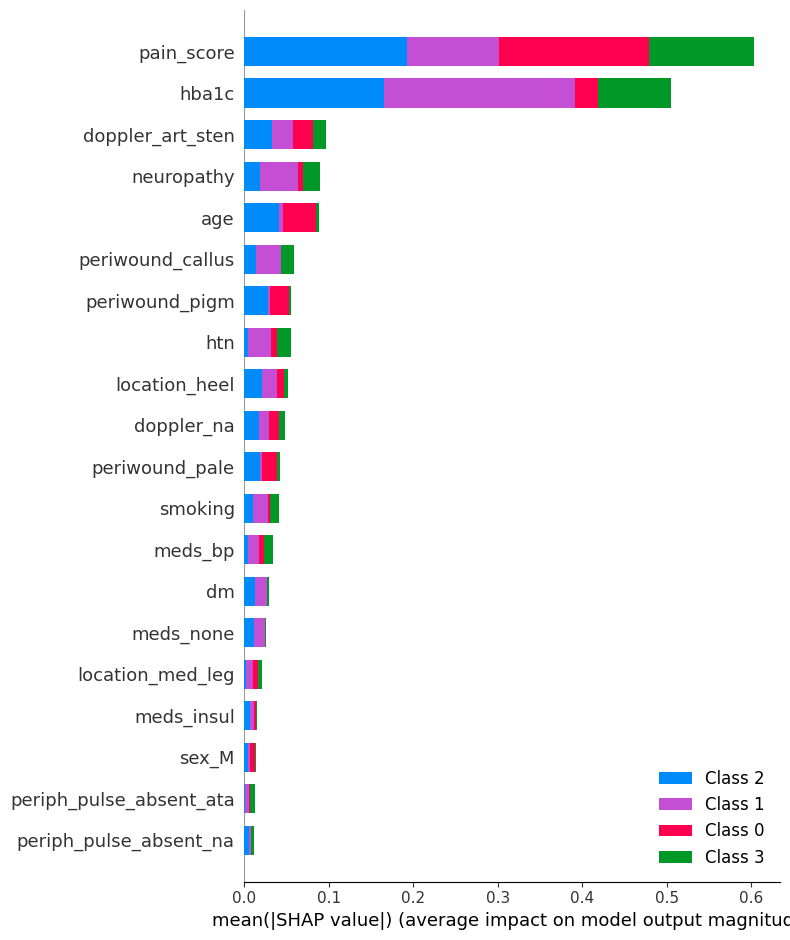

In [ ]:
shap.summary_plot(shap_values, features=x_tabular_single, feature_names=feature_names)

In [ ]:
df_processed['label'].unique()

array(['Arterial Ulcer', 'Venous Ulcer', 'Normal Skin',
       'Neurotrophic Ulcer'], dtype=object)

In [ ]:
class_names = np.unique(y)
class_names

array(['Arterial Ulcer', 'Neurotrophic Ulcer', 'Normal Skin',
       'Venous Ulcer'], dtype=object)

In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


def load_images(image_paths, target_size=(224, 224)):
    imgs = []
    valid_paths = []
    for path in image_paths:
        if os.path.isfile(path):
            img = image.load_img(path, target_size=target_size)
            imgs.append(image.img_to_array(img))
            valid_paths.append(path)
        else:
            print("Skipping invalid path:", path)
    return np.array(imgs, dtype=np.float32), valid_paths

X_val_img, valid_paths = load_images(val_df["image_path"].values)


val_valid_df = val_df[val_df["image_path"].isin(valid_paths)]
tab_cols = ['age', 'smoking', 'htn', 'dm', 'pain_score', 'neuropathy',
            'abi', 'hba1c', 'sex_F', 'sex_M', 'meds_ac', 'meds_bp',
            'meds_hf', 'meds_insul', 'meds_none', 'meds_oha',
            'location_ankle', 'location_ball', 'location_digit', 'location_dorsum',
            'location_heel', 'location_lat_foot', 'location_lat_leg',
            'location_med_leg', 'location_na', 'location_plantar',
            'periwound_callus', 'periwound_eczema', 'periwound_lipoderm',
            'periwound_na', 'periwound_pale', 'periwound_pigm',
            'periph_pulse_absent_ata', 'periph_pulse_absent_dp',
            'periph_pulse_absent_na', 'periph_pulse_absent_none',
            'periph_pulse_absent_pop', 'periph_pulse_absent_pta',
            'doppler_art_sten', 'doppler_na', 'doppler_normal',
            'doppler_ven_ins']

X_val_tab = val_valid_df[tab_cols].values.astype(np.float32)
X_val_tab = np.nan_to_num(X_val_tab, nan=0.0)
y_true = val_valid_df["label"].values


le = LabelEncoder()
y_true_num = le.fit_transform(y_true)


X_val_img_tf = tf.convert_to_tensor(X_val_img, dtype=tf.float32)
X_val_tab_tf = tf.convert_to_tensor(X_val_tab, dtype=tf.float32)


pred_probs = best_model([X_val_tab_tf, X_val_img_tf], training=False).numpy()


if pred_probs.shape[1] > 1:
    y_pred = np.argmax(pred_probs, axis=1)
else:
    y_pred = (pred_probs > 0.5).astype(int).ravel()


unique_labels = np.unique(y_true_num)
if len(unique_labels) < 2:
    print("Only one class present in validation set. Reporting accuracy and confusion matrix.")
    acc = accuracy_score(y_true_num, y_pred)
    cm = confusion_matrix(y_true_num, y_pred)
    print("Accuracy:", acc)
    print("Confusion matrix:\n", cm)
else:
    acc = accuracy_score(y_true_num, y_pred)
    prec = precision_score(y_true_num, y_pred, average="macro", zero_division=0)
    rec = recall_score(y_true_num, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_true_num, y_pred, average="macro", zero_division=0)
    cm = confusion_matrix(y_true_num, y_pred)

    print("Accuracy:", acc)
    print("Precision (macro):", prec)
    print("Recall (macro):", rec)
    print("F1-score (macro):", f1)
    print("Confusion matrix:\n", cm)

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Accuracy: 0.24324324324324326
Precision (macro): 0.060810810810810814
Recall (macro): 0.25
F1-score (macro): 0.09782608695652174
Confusion matrix:
 [[ 0  9  0  0]
 [ 0  9  0  0]
 [ 0  9  0  0]
 [ 0 10  0  0]]
Label mapping: {'Arterial Ulcer': 0, 'Neurotrophic Ulcer': 1, 'Normal Skin': 2, 'Venous Ulcer': 3}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 42)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast_to_float32     │ (None, 42)        │          0 │ input_layer[0][0] │
│ (CastToFloat32)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │      1,376 │ cast_to_float32[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast_to_float32_1   │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (CastToFloat32)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 32)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ cast_to_float32_… │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1024)      │     33,792 │ re_lu[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ normalization[0]… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 1024)      │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 100352)    │          0 │ resnet50[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 101376)    │          0 │ re_lu_1[0][0],    │
│ (Concatenate)       │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 4)         │    405,508 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classification_hea… │ (None, 4)         │          0 │ dense_2[0][0]     │
│ (Softmax)           │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,028,395 (91.66 MB)

 Trainable params: 23,975,268 (91.46 MB)

 Non-trainable params: 53,127 (207.53 KB)

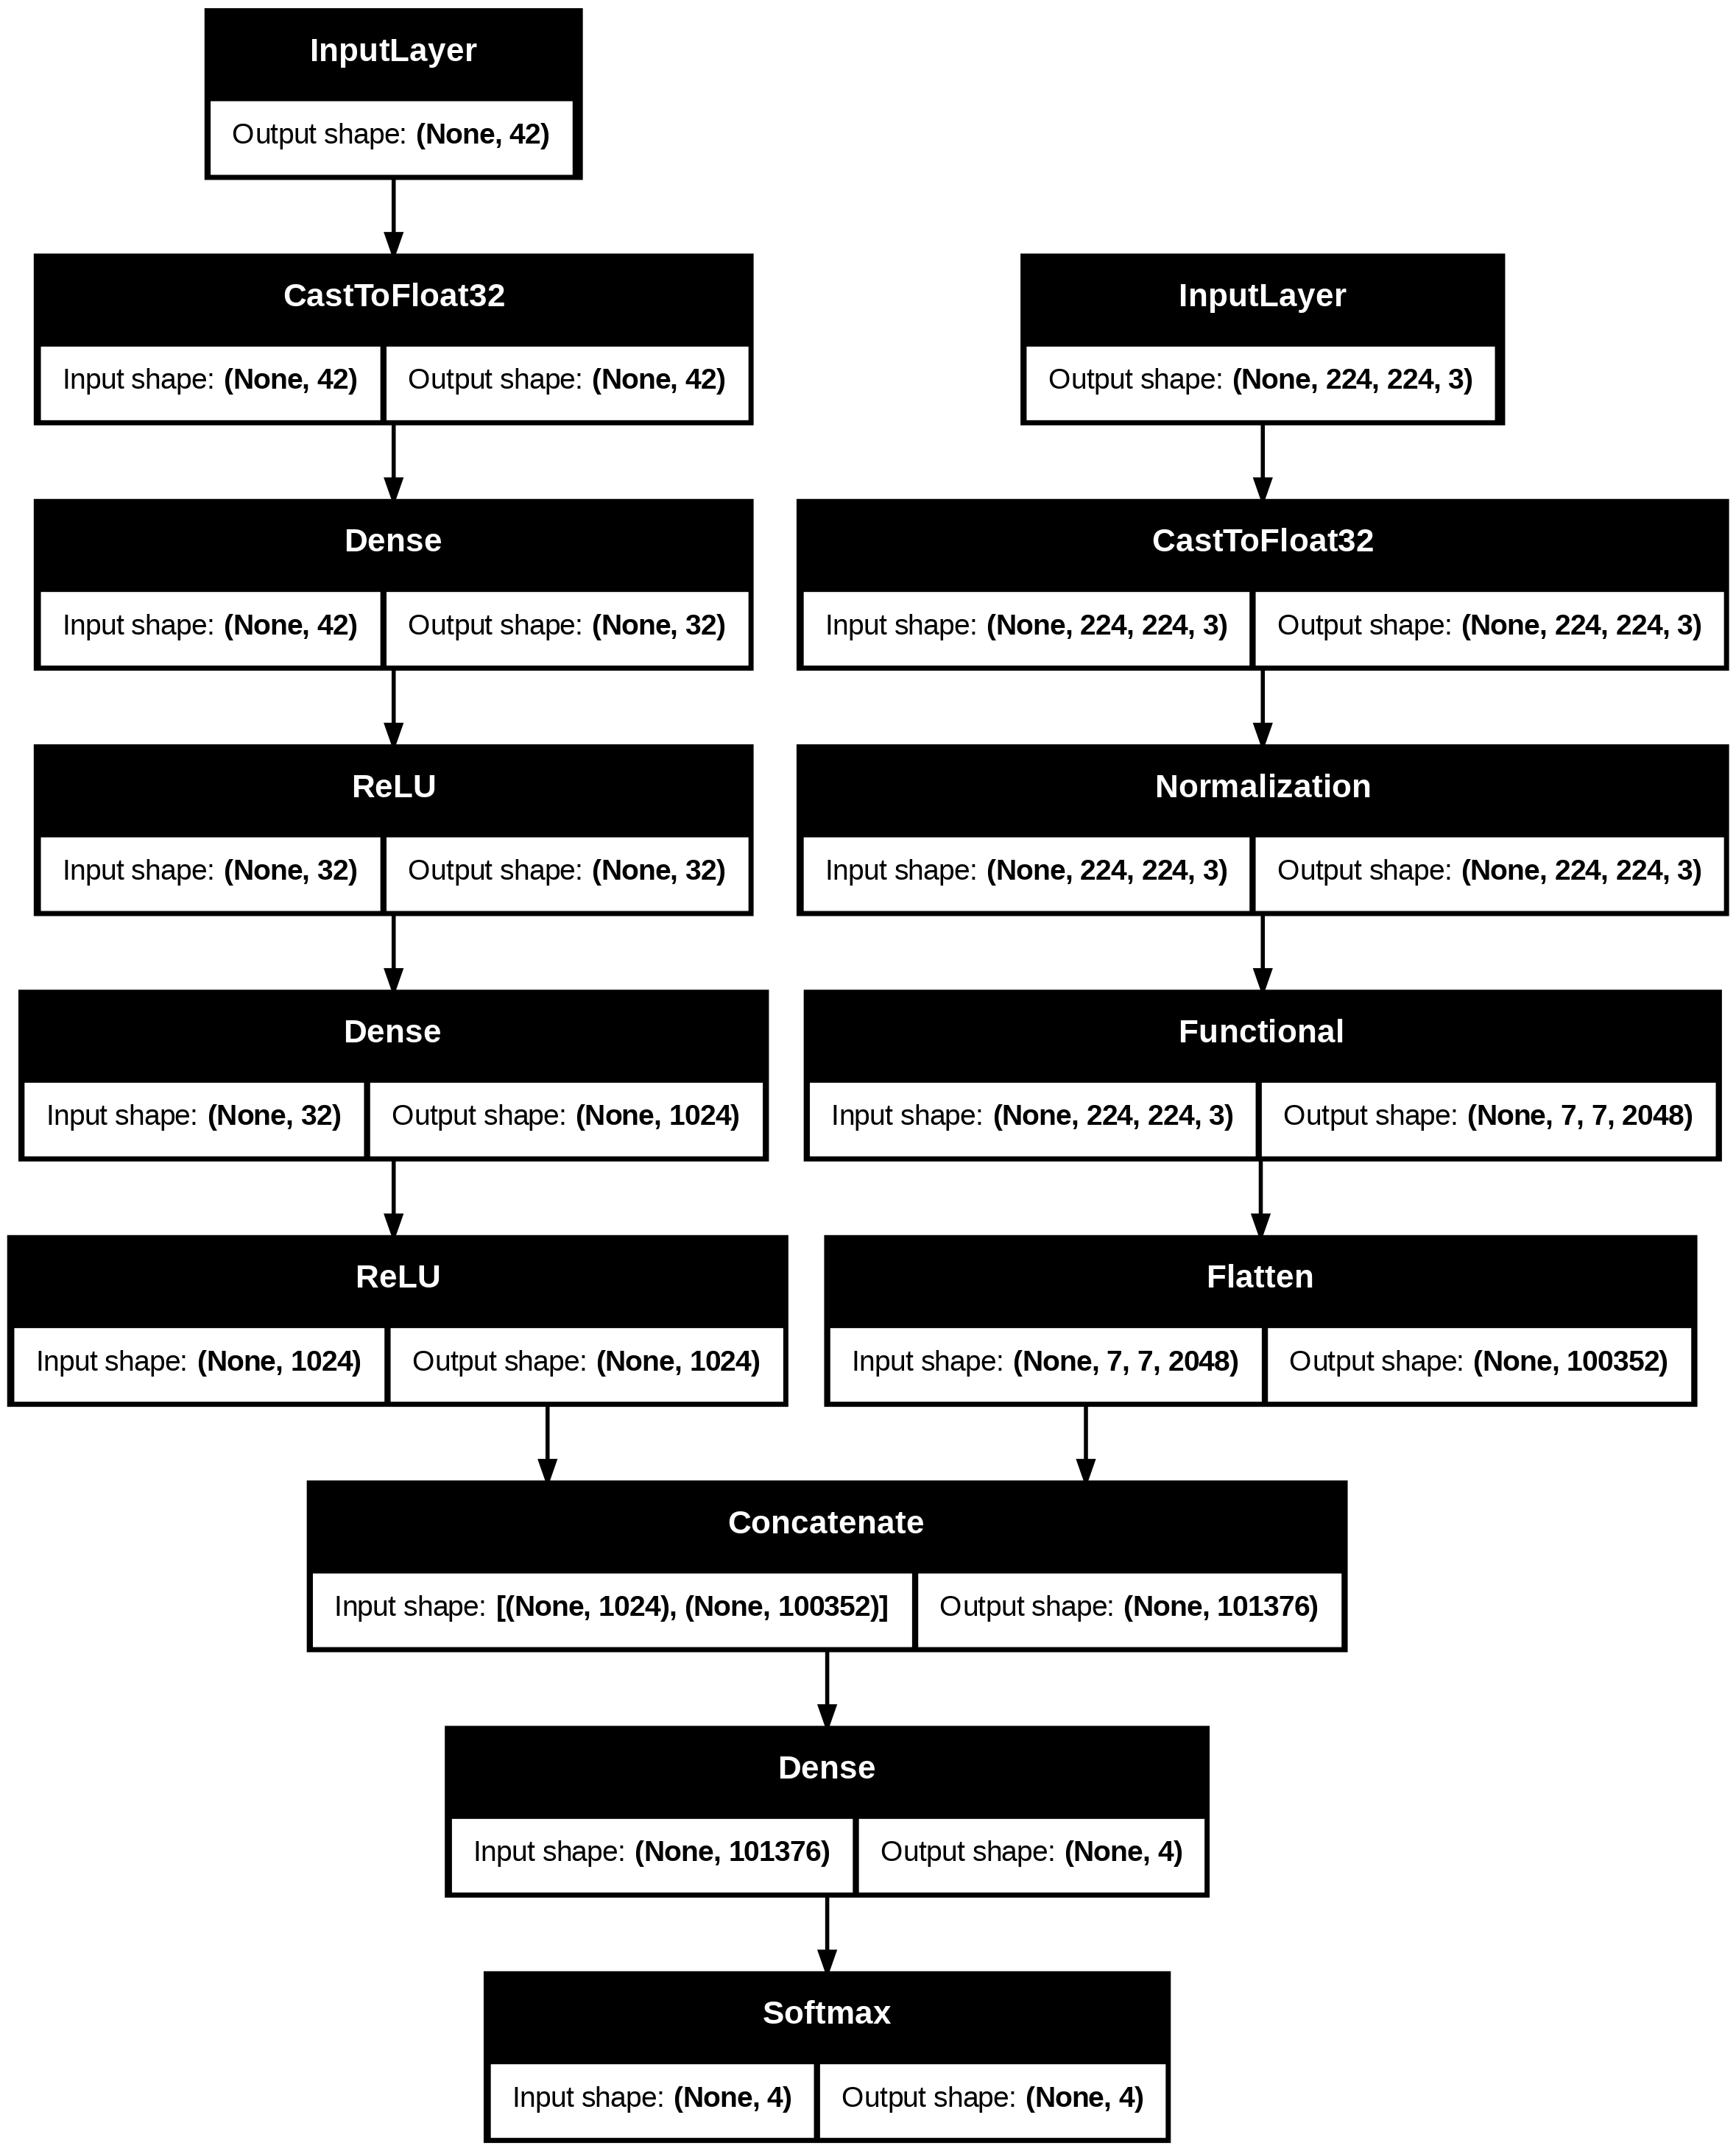

In [ ]:
best_model.summary()


from tensorflow.keras.utils import plot_model
plot_model(best_model, show_shapes=True, to_file="model_arch.png")